# Binary Classification Task
## Name: Pavly Salah Zaki
## Email: Pavly.Salah.Zaki@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/home/bot/anaconda3/envs/tf2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
!tree

.
├── binary_classifier_data
│   ├── training.csv
│   └── validation.csv
├── binary_classifier.ipynb
├── binary_classifier.py
├── Dockerfile
├── flask_website.py
├── __pycache__
│   └── binary_classifier.cpython-37.pyc
├── README.md
├── requirements.txt
├── static
│   └── style.css
└── templates
    └── index.html

4 directories, 11 files


## Load data

In [3]:
# Main folder path
FOLDER_PATH = 'binary_classifier_data'

In [4]:
# Read the train data
df_train = pd.read_csv(f'{FOLDER_PATH}/training.csv', sep=';')

In [5]:
df_train

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,"18,75","0,00075",u,g,q,v,"2,71",t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,"23,5",9e-04,u,g,q,v,"8,5",t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,"34,17","0,000917",u,g,c,v,"4,5",t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,"27,83","0,000154",u,g,W,v,"3,75",t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.


## Exploratory Data Analysis

In [6]:
df_train.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   object 
 2   variable3   3700 non-null   object 
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   object 
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(2), int64(3), ob

In [8]:
# drop any duplicates in the data
df_train.drop_duplicates(inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [9]:
df_train

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,b,"80,25","0,00055",u,g,NaN,NaN,"0,54",t,f,0,f,g,0.0,340,0.0,NaN,0,no.
486,b,"34,83","0,00025",y,p,W,v,3,f,f,0,f,s,200.0,0,2000000.0,f,0,no.
487,a,"55,75","0,000708",u,g,k,h,"6,75",t,t,3,t,g,100.0,50,1000000.0,NaN,0,no.
488,b,"22,17","0,0012125",u,g,c,v,"3,335",f,t,2,t,g,180.0,173,1800000.0,NaN,0,no.


**NOTE:** There were many duplicate values in the dataset

In [10]:
Drop an NaN values
df_train.dropna(inplace=True)
df_train

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,"34,83","0,000125",y,p,i,h,"0,5",f,f,0,t,g,160.0,0,1600000.0,f,0,no.
10,a,"24,75","0,0013665",u,g,q,h,"1,5",f,f,0,f,g,280.0,1,2800000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,a,25,"0,001233",u,g,cc,h,"3,5",t,t,6,f,g,400.0,458,4000000.0,t,1,yes.
477,b,"25,5","3,75e-05",u,g,m,v,"0,25",t,t,3,f,g,260.0,15108,2600000.0,t,1,yes.
479,a,"23,5",9e-04,u,g,q,v,"8,5",t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
482,a,"36,75","0,0005125",u,g,e,v,5,t,f,0,t,g,0.0,4000,0.0,f,1,yes.


In [11]:
df_train['classLabel'].value_counts()

no.     119
yes.     84
Name: classLabel, dtype: int64

**NOTE:** The dataset is fairly balanced.

In [12]:
def convert_cols(df):
    # Convert columns: 'variable2' 'variable3' 'variable8' to float
    df['variable2'] = df['variable2'].apply(lambda x: str(x).replace(',', '.'))
    df['variable2'] = pd.to_numeric(df['variable2'])

    df['variable3'] = df['variable3'].apply(lambda x: str(x).replace(',', '.'))
    df['variable3'] = pd.to_numeric(df['variable3'])

    df['variable8'] = df['variable8'].apply(lambda x: str(x).replace(',', '.'))
    df['variable8'] = pd.to_numeric(df['variable8'])
    return df

In [13]:
df_train = convert_cols(df_train)
df_train

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.75,f,t,1,t,g,80.0,5,800000.0,t,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.00,f,t,1,f,g,96.0,19,960000.0,t,0,no.
4,b,32.33,0.000350,u,g,k,v,0.50,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,34.83,0.000125,y,p,i,h,0.50,f,f,0,t,g,160.0,0,1600000.0,f,0,no.
10,a,24.75,0.001366,u,g,q,h,1.50,f,f,0,f,g,280.0,1,2800000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,a,25.00,0.001233,u,g,cc,h,3.50,t,t,6,f,g,400.0,458,4000000.0,t,1,yes.
477,b,25.50,0.000037,u,g,m,v,0.25,t,t,3,f,g,260.0,15108,2600000.0,t,1,yes.
479,a,23.50,0.000900,u,g,q,v,8.50,t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
482,a,36.75,0.000513,u,g,e,v,5.00,t,f,0,t,g,0.0,4000,0.0,f,1,yes.


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 486
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   203 non-null    object 
 1   variable2   203 non-null    float64
 2   variable3   203 non-null    float64
 3   variable4   203 non-null    object 
 4   variable5   203 non-null    object 
 5   variable6   203 non-null    object 
 6   variable7   203 non-null    object 
 7   variable8   203 non-null    float64
 8   variable9   203 non-null    object 
 9   variable10  203 non-null    object 
 10  variable11  203 non-null    int64  
 11  variable12  203 non-null    object 
 12  variable13  203 non-null    object 
 13  variable14  203 non-null    float64
 14  variable15  203 non-null    int64  
 15  variable17  203 non-null    float64
 16  variable18  203 non-null    object 
 17  variable19  203 non-null    int64  
 18  classLabel  203 non-null    object 
dtypes: float64(5), int64(3), obje

#### Encoding categorical columns

In [15]:
df_train.columns

Index(['variable1', 'variable2', 'variable3', 'variable4', 'variable5',
       'variable6', 'variable7', 'variable8', 'variable9', 'variable10',
       'variable11', 'variable12', 'variable13', 'variable14', 'variable15',
       'variable17', 'variable18', 'variable19', 'classLabel'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
def encode_df(df):
    '''
    Encode the categorical columns to numeric values
    '''
    CATEGORICAL_COLS = ['variable1', 'variable4', 'variable5',
       'variable6', 'variable7', 'variable9', 'variable10',
       'variable12', 'variable13', 'variable18', 'classLabel']

    df_enc = df.copy()
    for col in CATEGORICAL_COLS:
        df_enc[col] = le.fit_transform(df[col])

    return df_enc

In [18]:
df_train_enc = encode_df(df_train)
df_train_enc

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,0,17.92,0.000054,1,0,2,7,1.75,0,1,1,1,0,80.0,5,800000.0,1,0,0
2,1,31.25,0.000112,1,0,6,2,0.00,0,1,1,0,0,96.0,19,960000.0,1,0,0
4,1,32.33,0.000350,1,0,9,7,0.50,0,0,0,1,0,232.0,0,2320000.0,0,0,0
5,0,34.83,0.000125,2,2,7,3,0.50,0,0,0,1,0,160.0,0,1600000.0,0,0,0
10,0,24.75,0.001366,1,0,11,3,1.50,0,0,0,0,0,280.0,1,2800000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0,25.00,0.001233,1,0,3,3,3.50,1,1,6,0,0,400.0,458,4000000.0,1,1,1
477,1,25.50,0.000037,1,0,10,7,0.25,1,1,3,0,0,260.0,15108,2600000.0,1,1,1
479,0,23.50,0.000900,1,0,11,7,8.50,1,1,5,1,0,120.0,0,1200000.0,1,1,1
482,0,36.75,0.000513,1,0,5,7,5.00,1,0,0,1,0,0.0,4000,0.0,0,1,1


In [19]:
# Determine the X and Y for train
X_train = df_train_enc.iloc[:, :-1]
y_train = df_train_enc.iloc[:, -1]

#### Re-do pre-processing steps for the validation dataset

In [20]:
### Redo the previous steps forthe validation dataset
df_val = pd.read_csv(f'{FOLDER_PATH}/validation.csv', sep=';')

df_val = df_val.drop_duplicates()
df_val.reset_index(inplace=True, drop=True)

df_val.dropna(inplace=True)
df_val.reset_index(inplace=True, drop=True)

df_val = convert_cols(df_val)
df_val_enc = encode_df(df_val)

X_val = df_val_enc.iloc[:, :-1]
y_val = df_val_enc.iloc[:, -1]

### Models

#### 1. Select model

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [22]:
# Try a random ML model to see hot it performs
svm = SVC()

#### 2. Train model

In [23]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 3. Predictions

In [24]:
pred = svm.predict(np.array(X_train.iloc[0, :]).reshape(1, -1))

pred = 'no' if pred[0] == 0 else 'yes'
pred

'no'

In [25]:
preds = svm.predict(X_val)
f1_score(preds, y_val, average='micro')

0.5833333333333334

Performance isn't bad, but it can definitely be improved

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Try multiple classifiers and choose the best one
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

In [27]:
for clf in classifiers:
    print(f'Training {clf.__class__.__name__}')
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    print(f'F1-score: {f1_score(preds, y_val, average="micro"):.3f}')

Training LogisticRegression
F1-score: 0.607
Training KNeighborsClassifier
F1-score: 0.619
Training SVC
F1-score: 0.595
Training RandomForestClassifier
F1-score: 0.607
Training MLPClassifier
F1-score: 0.417
Training GaussianNB
F1-score: 0.631


#### Random Forrest gave the best f1_score.

In [28]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
print(f'Training {clf.__class__.__name__}')
clf.fit(X_train, y_train)
preds = clf.predict(X_val)
print(f'F1-score: {f1_score(preds, y_val, average="micro"):.3f}')

Training RandomForestClassifier
F1-score: 0.762


#### Confusion Matrix

Text(0.5, 1, 'Confusion Matrix of Rando Forrest Classifier')

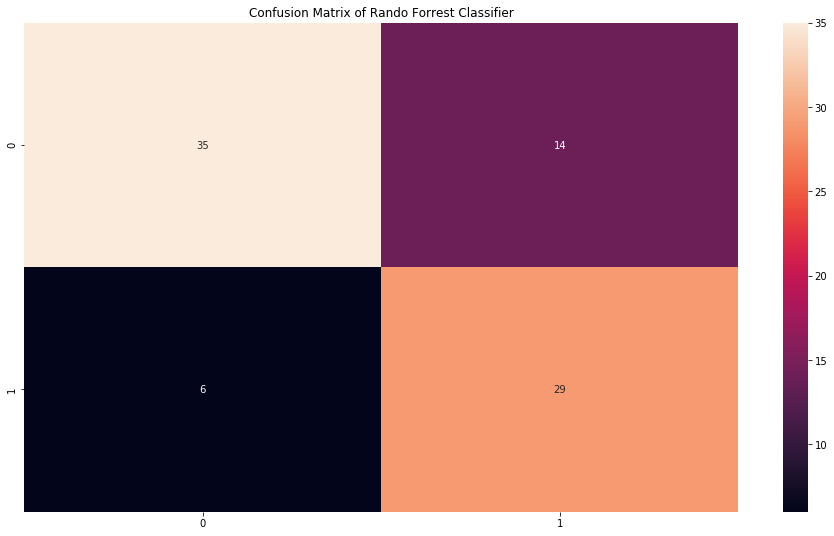

In [29]:
from sklearn.metrics import confusion_matrix

cnf_mat = confusion_matrix(y_true=y_val, y_pred=preds)

plt.figure(figsize=(16, 9))
sns.heatmap(cnf_mat, annot=True)

plt.title('Confusion Matrix of Rando Forrest Classifier')

In [30]:
random_sample_index = np.random.randint(len(df_val_enc))
random_sample = X_val.iloc[random_sample_index, :]
random_sample = np.array(random_sample).reshape(1, -1)

y_pred = int(clf.predict(random_sample))

y_true = 'no' if y_val[random_sample_index] == 0 else 'yes'
y_pred = 'no' if y_pred == 0 else 'yes'

print(f'Y true: {y_true}')
print(f'Y pred: {y_pred}')

Y true: no
Y pred: no


In [31]:
# Convert string data (like the input from the Flask forum) to a dataframe
# In order to be able to process it
import io
data = '"a";17,92;5,4e-05;"u";"g";"c";"v";1,75;"f";"t";1;"t";"g";80;5;8e+05;"t";0;"no."'

x = pd.read_csv(io.StringIO(data), sep=';', header=None)
x.columns = ['variable1', 'variable2', 'variable3', 'variable4', 'variable5',
       'variable6', 'variable7', 'variable8', 'variable9', 'variable10',
       'variable11', 'variable12', 'variable13', 'variable14', 'variable15',
       'variable17', 'variable18', 'variable19', 'classLabel']
x

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80,5,800000.0,t,0,no.


In [33]:
print(len(x.columns))

19


Done. ^ ^